In [1]:
import numpy as np

In [2]:
np.__version__

'1.20.3'

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [12]:
file_path = "C:/Users/Vinay Vivek/Downloads/data.csv"
df = pd.read_csv(file_path)

In [13]:
print(df.describe())

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [14]:
if df.isnull().values.any():
    df.fillna(df.mean(), inplace=True)

In [15]:
aggre_colms = ['Duration', 'Calories']
aggre_functs = ['min', 'max', 'count', 'mean']
print(df[aggre_colms].agg(aggre_functs))

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [17]:
df_fil1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
df_fil1

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [18]:
df_fil2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
df_fil2

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [19]:
df_modi = df.drop('Maxpulse', axis=1)
df_modi

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [20]:
df.drop('Maxpulse', axis=1, inplace=True)
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [22]:
df['Calories'] = df['Calories'].astype(int)
df

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


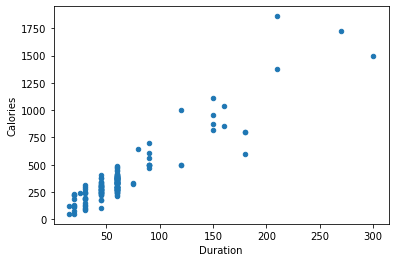

In [23]:
df.plot(kind='scatter', x='Duration', y='Calories')
plt.show()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
file_path = "C:/Users/Vinay Vivek/Downloads/Dataset/Dataset/train.csv"
titanic_df = pd.read_csv(file_path)

In [7]:
correlation = titanic_df['Survived'].corr(titanic_df['Sex'].map({'male': 0, 'female': 1}))

print(f"Correlation between 'Survived' and 'Sex': {correlation}")

Correlation between 'Survived' and 'Sex': 0.543351380657755


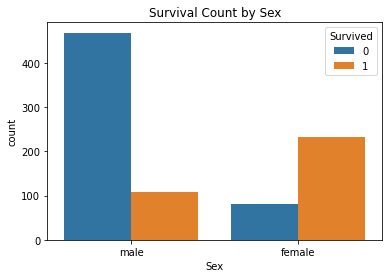

In [8]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Sex')
plt.show()

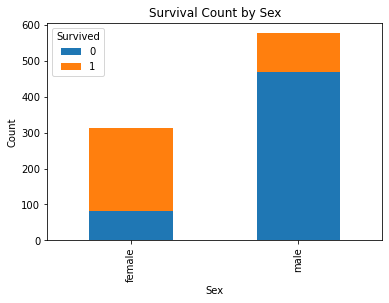

In [9]:
grouped = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [10]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']


In [11]:
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [35]:
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5581395348837209


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [17]:
file_path = "C:/Users/Vinay Vivek/Downloads/Dataset/Dataset/glass.csv"

glass_data = pd.read_csv(file_path)

In [18]:
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = gnb.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5581395348837209
              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
svm = LinearSVC()
svm.fit(X_train, y_train)

C:\Users\Vinay Vivek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [27]:
y_pred = svm.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4883720930232558
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.40      1.00      0.57        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           7       0.86      0.75      0.80         8

    accuracy                           0.49        43
   macro avg       0.38      0.33      0.30        43
weighted avg       0.38      0.49      0.37        43



C:\Users\Vinay Vivek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay Vivek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay Vivek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


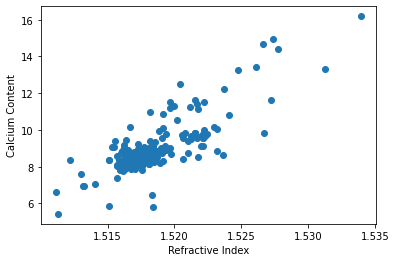

In [29]:
plt.scatter(glass_data['RI'], glass_data['Ca'])
plt.xlabel("Refractive Index")
plt.ylabel("Calcium Content")
plt.show()

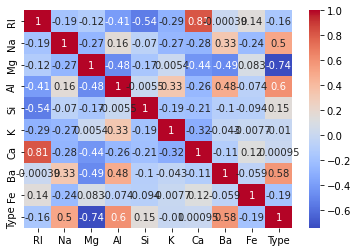

In [30]:
import seaborn as sns

sns.heatmap(glass_data.corr(), annot=True, cmap='coolwarm')
plt.show()